In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
!pip install yfinance
import yfinance as yf

# Download last 2 years of Bitcoin data
btc = yf.download("BTC-USD", start="2023-01-01", end="2025-01-01")

btc.head()


/tmp/ipython-input-3418964276.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  btc = yf.download("BTC-USD", start="2023-01-01", end="2025-01-01")
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2023-01-01,16625.080078,16630.439453,16521.234375,16547.914062,9244361700
2023-01-02,16688.470703,16759.343750,16572.228516,16625.509766,12097775227
2023-01-03,16679.857422,16760.447266,16622.371094,16688.847656,13903079207
2023-01-04,16863.238281,16964.585938,16667.763672,16680.205078,18421743322
2023-01-05,16836.736328,16884.021484,16790.283203,16863.472656,13692758566


In [4]:
# Basic info
print(btc.info())

# Summary stats
print(btc.describe())

# First few rows
btc.head()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 731 entries, 2023-01-01 to 2024-12-31
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   731 non-null    float64
 1   (High, BTC-USD)    731 non-null    float64
 2   (Low, BTC-USD)     731 non-null    float64
 3   (Open, BTC-USD)    731 non-null    float64
 4   (Volume, BTC-USD)  731 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 34.3 KB
None
Price           Close           High            Low           Open  \
Ticker        BTC-USD        BTC-USD        BTC-USD        BTC-USD   
count      731.000000     731.000000     731.000000     731.000000   
mean     47437.161067   48255.729437   46474.866471   47332.259656   
std      21675.093627   22139.627068   21128.637216   21639.069063   
min      16625.080078   16630.439453   16521.234375   16547.914062   
25%      27778.728516   28185.916992   27245.493164   27756.75781

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2023-01-01,16625.080078,16630.439453,16521.234375,16547.914062,9244361700
2023-01-02,16688.470703,16759.343750,16572.228516,16625.509766,12097775227
2023-01-03,16679.857422,16760.447266,16622.371094,16688.847656,13903079207
2023-01-04,16863.238281,16964.585938,16667.763672,16680.205078,18421743322
2023-01-05,16836.736328,16884.021484,16790.283203,16863.472656,13692758566


In [5]:
# % Change in closing price
btc['Daily_Return'] = btc['Close'].pct_change()

# Show first 10 returns
btc['Daily_Return'].head(10)


,Daily_Return
Date,
2023-01-01,NaN
2023-01-02,0.003813
2023-01-03,-0.000516
2023-01-04,0.010994
2023-01-05,-0.001572
2023-01-06,0.006844
2023-01-07,0.000183
2023-01-08,0.008025
2023-01-09,0.006168


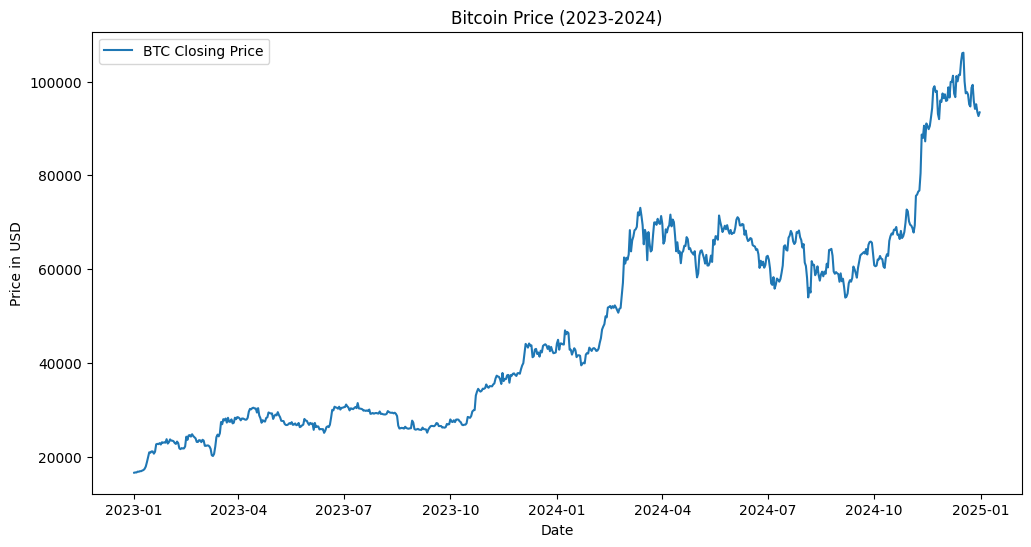

In [6]:
plt.figure(figsize=(12,6))
plt.plot(btc['Close'], label="BTC Closing Price")
plt.title("Bitcoin Price (2023-2024)")
plt.xlabel("Date")
plt.ylabel("Price in USD")
plt.legend()
plt.show()


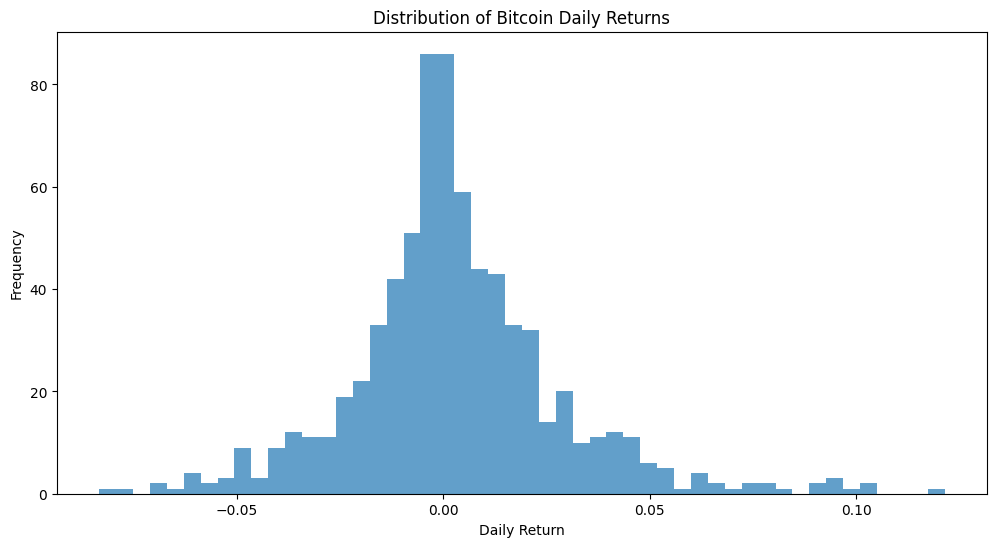

In [7]:
plt.figure(figsize=(12,6))
btc['Daily_Return'].plot(kind='hist', bins=50, alpha=0.7)
plt.title("Distribution of Bitcoin Daily Returns")
plt.xlabel("Daily Return")
plt.show()


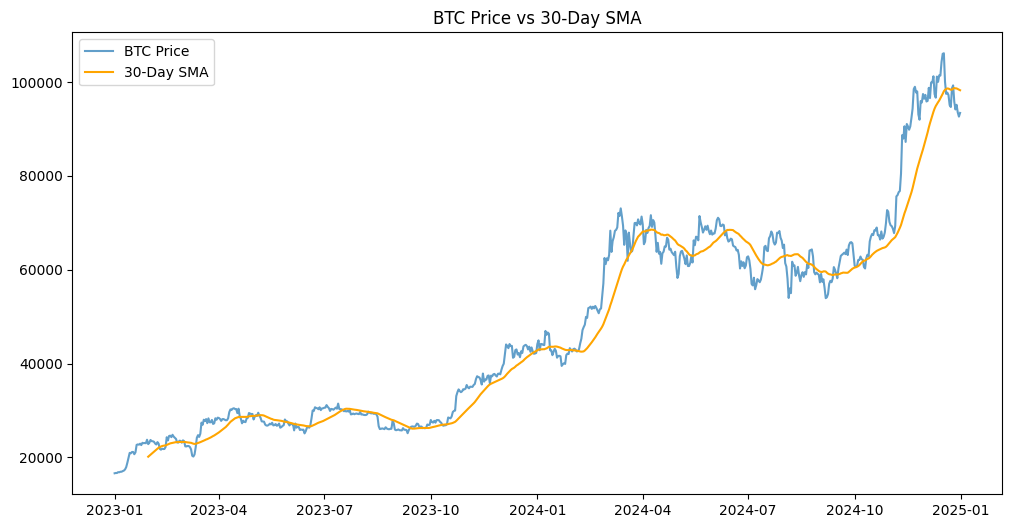

In [8]:
btc['SMA_30'] = btc['Close'].rolling(window=30).mean()

plt.figure(figsize=(12,6))
plt.plot(btc['Close'], label="BTC Price", alpha=0.7)
plt.plot(btc['SMA_30'], label="30-Day SMA", color='orange')
plt.title("BTC Price vs 30-Day SMA")
plt.legend()
plt.show()
